In [9]:
import os
from glob import glob
import json
import torchaudio
import numpy as np
import pandas as pd

BASE_DIR = '/root/class/cmu/LSMA/ast'
DATA_DIR = '/shared/youngkim/dataset'

AUDIO_DIR = os.path.join(DATA_DIR, 'wav_16k')
wav_file_paths = glob(os.path.join(AUDIO_DIR, '*'))
col_name = [i for i in range(15)]


In [2]:
col_name = [i for i in range(15)]
csv_path = '/root/class/cmu/LSMA/ast/egs/med/exp/e5-mixup0.5-freqm48-timem192/fold1/inference/cum_predictions.csv'
infer = pd.read_csv(csv_path, names=col_name)
infer

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.937012,0.598828,0.397192,0.373486,0.989746,0.190527,0.170642,0.225928,0.400879,0.362158,0.266016,0.262158,0.556006,0.211304,0.196802
1,0.971680,0.399561,0.268481,0.180530,0.350488,0.136316,0.261353,0.204565,0.994336,0.618848,0.185449,0.196484,0.907129,0.409814,0.169946
2,0.969727,0.424121,0.657471,0.704199,0.193665,0.176758,0.150867,0.255054,0.329102,0.248633,0.290918,0.455908,0.327295,0.445117,0.993066
3,0.938281,0.317725,0.343555,0.550488,0.332153,0.151282,0.254321,0.210767,0.316016,0.722266,0.446191,0.217529,0.992871,0.138208,0.334619
4,0.990527,0.392188,0.180786,0.258594,0.268921,0.526563,0.982617,0.852734,0.295947,0.225854,0.117535,0.760938,0.346582,0.129272,0.088782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0.808887,0.416406,0.491357,0.972363,0.772656,0.283960,0.184033,0.325781,0.058777,0.534766,0.348315,0.655078,0.579248,0.076709,0.843652
745,0.937793,0.250049,0.358936,0.579199,0.257104,0.431299,0.580664,0.400439,0.560547,0.992480,0.441504,0.486475,0.496924,0.130457,0.161450
746,0.733789,0.353540,0.960645,0.595605,0.399121,0.918848,0.253345,0.288281,0.322827,0.587354,0.373901,0.738965,0.590137,0.208960,0.338794
747,0.948340,0.329517,0.842773,0.554492,0.950195,0.155835,0.467236,0.365039,0.117175,0.177344,0.164038,0.920020,0.287183,0.088940,0.737109


In [3]:
infer = infer.to_numpy()
infer.shape

(749, 15)

In [4]:
preds = np.argmax(infer, axis=1)
preds.shape

(749,)

In [5]:
sub_df = pd.read_csv(os.path.join(DATA_DIR, 'labels/test_for_students.csv'))
sub_df['Category'] = preds
sub_df.to_csv('/root/class/cmu/LSMA/ast/submission_mixup0.5.csv', index=False)

In [6]:
pd.read_csv('/root/class/cmu/LSMA/ast/submission_mixup0.5.csv')

,Id,Category
0,LTExODM2Mzc0ODQyOTc1ODE4NDM=,4
1,LTUwNDU3NzgyNjE2Mzk0OTU1NjQ=,8
2,ODU3OTE0MDU5NzM5NDI2MDQ2,14
3,LTQ4OTE2NDk5ODk4MTA3NDY5Mzg=,12
4,MjkzNzMwNzkxNTg5NDA1Mjk3NQ==,0
...,...,...
744,Nzk0NzA0MjYxMTg3NDkxNjQ4OQ==,3
745,LTMzMjA0NjkyNzYwMDQ0NDUyNzY=,9
746,LTQxNDgxNjU0MzY3OTQzNzIzMTc=,2
747,NjQyMjk5MDM5OTgwNzY2NDU1MQ==,4


In [9]:
!kaggle competitions submit -c 11775-s22-hw1 -f {BASE_DIR}/submission_mixup0.5.csv -m "ast submission e5-mixup0.5-freqm48-timem192"

100%|██████████████████████████████████████| 22.7k/22.7k [00:04<00:00, 4.75kB/s]
Successfully submitted to HW1: Audio-based MED

In [21]:
pd.read_csv('/root/class/cmu/LSMA/ast/submission.csv')

,Id,Category
0,LTExODM2Mzc0ODQyOTc1ODE4NDM=,4
1,LTUwNDU3NzgyNjE2Mzk0OTU1NjQ=,8
2,ODU3OTE0MDU5NzM5NDI2MDQ2,14
3,LTQ4OTE2NDk5ODk4MTA3NDY5Mzg=,12
4,MjkzNzMwNzkxNTg5NDA1Mjk3NQ==,6
...,...,...
744,Nzk0NzA0MjYxMTg3NDkxNjQ4OQ==,3
745,LTMzMjA0NjkyNzYwMDQ0NDUyNzY=,9
746,LTQxNDgxNjU0MzY3OTQzNzIzMTc=,2
747,NjQyMjk5MDM5OTgwNzY2NDU1MQ==,11


In [17]:
with open(f'{DATA_DIR}/datafiles/med_test_data.json') as f:
    test_data = json.load(f)
test_data

{'data': [{'wav': '/shared/youngkim/dataset/wav_16k/LTExODM2Mzc0ODQyOTc1ODE4NDM=.wav',
   'labels': 0},
  {'wav': '/shared/youngkim/dataset/wav_16k/LTUwNDU3NzgyNjE2Mzk0OTU1NjQ=.wav',
   'labels': 1},
  {'wav': '/shared/youngkim/dataset/wav_16k/ODU3OTE0MDU5NzM5NDI2MDQ2.wav',
   'labels': 2},
  {'wav': '/shared/youngkim/dataset/wav_16k/LTQ4OTE2NDk5ODk4MTA3NDY5Mzg=.wav',
   'labels': 3},
  {'wav': '/shared/youngkim/dataset/wav_16k/MjkzNzMwNzkxNTg5NDA1Mjk3NQ==.wav',
   'labels': 4},
  {'wav': '/shared/youngkim/dataset/wav_16k/LTY0NTMxOTc0MjIxMjcyMTg4NDM=.wav',
   'labels': 5},
  {'wav': '/shared/youngkim/dataset/wav_16k/OTEyOTc1NjM5NjAyMjM1MjE5.wav',
   'labels': 6},
  {'wav': '/shared/youngkim/dataset/wav_16k/LTU0ODExMzc4Nzc4ODg2NDIzNDA=.wav',
   'labels': 7},
  {'wav': '/shared/youngkim/dataset/wav_16k/NTMyNzg5MzE4ODM4Mzg5NzIzMQ==.wav',
   'labels': 8},
  {'wav': '/shared/youngkim/dataset/wav_16k/ODQzOTk5ODA1MDM2NDg3MTM1Mw==.wav',
   'labels': 9},
  {'wav': '/shared/youngkim/dataset/wav_

In [2]:
EXP_DIR = os.path.join(DATA_DIR, 'exp/e10-mixup0-freqm48-timem192')

In [18]:
cums = glob(os.path.join(EXP_DIR, '*/inference/cum_predictions.csv'))
# preds = glob(os.path.join(EXP_DIR, '*/inference/predictions_10.csv'))
cums

['/shared/youngkim/dataset/exp/e10-mixup0-freqm48-timem192/fold1/inference/cum_predictions.csv',
 '/shared/youngkim/dataset/exp/e10-mixup0-freqm48-timem192/fold2/inference/cum_predictions.csv',
 '/shared/youngkim/dataset/exp/e10-mixup0-freqm48-timem192/fold0/inference/cum_predictions.csv',
 '/shared/youngkim/dataset/exp/e10-mixup0-freqm48-timem192/fold3/inference/cum_predictions.csv',
 '/shared/youngkim/dataset/exp/e10-mixup0-freqm48-timem192/fold4/inference/cum_predictions.csv']

In [20]:
def gen_pred(path):
    df = pd.read_csv(path, names=col_name)
    df = np.argmax(df.to_numpy(), axis=1)
    return df

def get_soft(path):
    df = pd.read_csv(path, names=col_name)
    return df.to_numpy()

In [22]:
for i, cum in enumerate(cums):
    if i == 0:
        pred = get_soft(cum)
    else:
        pred += get_soft(cum)
pred /= 5
pred.shape

(749, 15)

In [23]:
pred = np.argmax(pred, axis=1)
pred.shape

(749,)

In [29]:
sub_df = pd.read_csv(os.path.join(DATA_DIR, 'labels/test_for_students.csv'))
sub_df['Category'] = pred
sub_df.to_csv('/root/class/cmu/LSMA/ast/submission-freqm48-timem192.csv', index=False)
pd.read_csv('/root/class/cmu/LSMA/ast/submission-freqm48-timem192.csv')

,Id,Category
0,LTExODM2Mzc0ODQyOTc1ODE4NDM=,4
1,LTUwNDU3NzgyNjE2Mzk0OTU1NjQ=,8
2,ODU3OTE0MDU5NzM5NDI2MDQ2,14
3,LTQ4OTE2NDk5ODk4MTA3NDY5Mzg=,12
4,MjkzNzMwNzkxNTg5NDA1Mjk3NQ==,6
...,...,...
744,Nzk0NzA0MjYxMTg3NDkxNjQ4OQ==,3
745,LTMzMjA0NjkyNzYwMDQ0NDUyNzY=,9
746,LTQxNDgxNjU0MzY3OTQzNzIzMTc=,2
747,NjQyMjk5MDM5OTgwNzY2NDU1MQ==,11


In [30]:
!kaggle competitions submit -c 11775-s22-hw1 -f {BASE_DIR}/submission-freqm48-timem192.csv -m "ast submission e10-mixup0-freqm48-timem192"

100%|██████████████████████████████████████| 22.7k/22.7k [00:03<00:00, 7.30kB/s]
Successfully submitted to HW1: Audio-based MED

In [31]:
cum = pd.read_csv(os.path.join(EXP_DIR, 'fold0/predictions/cum_predictions.csv'), names=col_name)
pred = pd.read_csv(os.path.join(EXP_DIR, 'fold0/predictions/predictions_10.csv'), names=col_name)
target = pd.read_csv(os.path.join(EXP_DIR, 'fold0/predictions/target.csv'), names=col_name)

In [32]:
cum = np.argmax(cum.to_numpy(), axis=1)
pred = np.argmax(pred.to_numpy(), axis=1)
target = np.argmax(target.to_numpy(), axis=1)

In [33]:
acc_cum = np.sum(cum == target) / len(cum)
acc_pred = np.sum(pred == target) / len(pred)
acc_cum, acc_pred

(0.7886666666666666, 0.7746666666666666)

<AxesSubplot:>

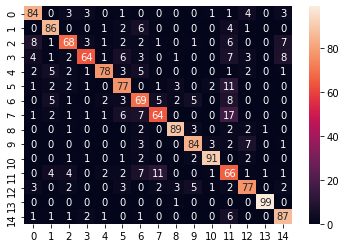

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(target, cum)
sns.heatmap(cf_matrix, annot=True)